<a href="https://colab.research.google.com/github/rushikeshskambale07/EDA_Capstone_Project_1/blob/main/EDA_Capstone_Project_(Individual)_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Hotel Booking Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Rushikesh Kambale

# **Project Summary -**

I selected Hotel Booking Analysis as my first EDA Capstone Project because I thought this topic may provide us new information about Hotel Industry which might be also useful to hotel owners to help hotel businesses to set their market price based on the increasing or decreasing demand. In this project I used one CSV file containing data about hotel bookings. In first as we started project I faced lot of confusions and problems about project because this was our first project. So I started to referencing other project for guidance. By referencing I got some ideas that which question I might want to answer from given data to get proper idea of how hotel bookings, castings, cancellation varies during whole season or given period. So during the process I studied various projects and I got the idea of how to move forward with the project so individually I started a project and then the next hurdle come across me was how to tackle with so many missing values specially in columns like "company" , "agent" , "country" , "children", etc. hence I got all the missing values by different libraries like 'Numpy', 'Pandas', 'Matplotlib', 'Seaborne', etc. and then I replaced all the missing values with the rounded mean value. Country column contains country codes representing different countries. It is a categorical feature so we replaced it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I replaced it with the country that appears the most often. We can see different data types for different columns. After cleaning all the data I got to know full preview of data and now we can tackle questions for which I want to know answers. For guidance we also searched previous EDA projects that might be right questions that need to be answered. So we selected few question like which type of hotel customers prefer? What is month wise average ADR? What is room wise ADR? From which country the most customers came? Which type of hotel type get most repeated customer? And we tried to answer it on above analysis. In conclusion we find out the most preferred hotel type is city hotel, the most visitors came from country Portugal , Hotel saw highest occupancy in month of august , cancellation percentage is near about 40% for city type hotel and much more.

# **GitHub Link -**

https://github.com/rushikeshskambale07/EDA_Capstone_Project_1

# **Problem Statement**

An effort has been made in this project to analyse various aspects of booking behaviour by customers to answer various business challenges that are faced by hotel through rigourous study of:

1) Origination of guests i.e where do guests originally come from so that footfall from  those countries can be further increased through additional public advertisements. Extra effort can also be made to retain them through personalised contact through emails, phone calls etc even after they leave.

2) Monthly booking pattern and find the  busiest quarter/trimester  of the year. This required to understand the need to increasing the temporary manpower to cater to extra load during busy months as well as  increase promotions and adjust average daily rate to increase the occupancy during lean period.

3)Duration of the stay by various guests to provide smart pricing structure to increase stay.

4)Meal pattern to optimise the kitchen inventory and manpower requirement in cafetaria.

5)Study booking pattern by various market segments to encourage rewards and recognition for the ones providing more business.

6)Room type in great demand to encourage Hotels to add the specific room type while going for capacity addition.

7)Average Daily rate dependency on season,room type & allotment of demanded room type to optimise the price for greater occupancy.

8)Booking cancellation pattern considering various parameters like hotel type,leadtime,season,deposit etc.to plan overbooking as well as devise means like penalty amount etc.

9) Customer retention pattern based on Hotel type to lay special emphasis on improving the experience to retain the customers.

#### **Define Your Business Objective?**

Maximise Bookings, Minimise Canecellations , Maximise Customer retention as well as stay longevity.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [22]:
# Import Libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [9]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load Dataset
df= pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

### Dataset First View

In [14]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
#Dataset second look
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information



In [17]:
# Checking basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [18]:
# Finding of dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [44]:
# Missing Values/Null Values Count
temp_df=df.isnull().sum().reset_index().rename(columns={'index':'Columns',0:'Null Values'})
temp_df

# Null Value by plotting Bar Graph
px.bar(temp_df,x='Columns',y='Null Values',width= 1000, height= 600,text_auto=True)

From this bar graph we can conclude that we have got 4 null values in 'children' column, 488 null values in 'country' column, 16.34K null values in 'agent' column and lastly 112.593K null values in 'company' column.


In [47]:
#Id number for agent or company is null is replace with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)


###Children column contains the count of children, so we will replace all the missing values with the rounded mean value.
###And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often

In [82]:
#for missing children value, replace it with rounded mean value
df['children'].fillna(round(df.children.mean()), inplace=True)

#For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(df.country.mode().to_string(), inplace=True)

In [ ]:
df.dtypes

### What did you know about your dataset?

The dataset given is a dataset from hotel industry, and we have to explore and analyze the data to discover important factors that govern the bookings.

The goal is to analyze the dataset by exploring data provided under various column headings.

The above dataset has 119390 rows and 32 columns. There are no null values in any columns except for 4 columns(children,country,agent,company). The dataset also have 31994 duplicate values

## ***2. Understanding Your Variables***

In [54]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description 

* **Hotel:**  H1= Resort Hotel, H2= City Hotel
* **is_canceled** : If the booking was canceled(1) or not(0)
* **lead_time** : Number of days that elapsed between the entering date of the  booking into the PMS(Property Management System) and the arrival date
* **arrival_date_year** : Year of arrival date.
* **arrival_date_month** : Month of arrival date.
* **arrival_date_week_number** : Week number for arrival date.
* **arrival_date_day_of_month**: Which day of the months guest is arriving.
* **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
* **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
* **adults** : Number of adults.
* **children** : Number of children.
* **babies** : Number of babies.
* **meal**: kind of meal opted for.
* **country** : Country code.
* **market_segment**: Through which channel hotels were booked.
* **distribution_channel** : How the customer accessed the stay- Corporate Booking/Direct/TA.TO
* **is_repeated_guest** : The values indicating if the booking name was from a repeated guest (1) or not (0).
* **previous_cancellations** : Was there a cancellation before.
* **previous_bookings_not_canceled** : Count of previous bookings not cancelled.
* **reserved_room_type** : Code of room type reserved.
* **assigned_room_type** : Code for the type of room assigned to the booking.
* **booking_changes** : Count of changes made to booking.
* **deposit_type** : Deposit type.
* **agent** : If the booking happens through agents or not.
* **company** : If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.
* **days_in_waiting_list** : Number of days the booking was on the waiting list before the confirmation to the customer.
* **customer_type** : Booking type like Transient – Transient-Party – Contract – Group.
* **adr** : Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.
* **required_car_parking_spaces** : How many parking areas are necessary for the customers.
* **total_of_special_requests** : Total unique requests from consumers.
* **reservation_status**: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out;No-Show.
* **reservation_status_date**: The last status date.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for item in list(df.columns):
  print(f"Column name: {item} - No. of unique values: {df[item].nunique()}")

Column name: hotel - No. of unique values: 2
Column name: is_canceled - No. of unique values: 2
Column name: lead_time - No. of unique values: 479
Column name: arrival_date_year - No. of unique values: 3
Column name: arrival_date_month - No. of unique values: 12
Column name: arrival_date_week_number - No. of unique values: 53
Column name: arrival_date_day_of_month - No. of unique values: 31
Column name: stays_in_weekend_nights - No. of unique values: 17
Column name: stays_in_week_nights - No. of unique values: 35
Column name: adults - No. of unique values: 14
Column name: children - No. of unique values: 5
Column name: babies - No. of unique values: 5
Column name: meal - No. of unique values: 5
Column name: country - No. of unique values: 177
Column name: market_segment - No. of unique values: 8
Column name: distribution_channel - No. of unique values: 5
Column name: is_repeated_guest - No. of unique values: 2
Column name: previous_cancellations - No. of unique values: 15
Column name: 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [55]:
# Firstly lets make a copy of our df to work on
copy_df=df.copy()

In [ ]:
copy_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [67]:
# To make our data clean is delete duplicate values from the dataset
copy_df.drop_duplicates(inplace=True)
copy_df.shape

(87389, 31)

In [61]:
# Checking percenatge of null values for each column
100*(copy_df.isna().sum()/copy_df.shape[0]).sort_values(ascending=False)

hotel                             0.0
is_repeated_guest                 0.0
reservation_status                0.0
total_of_special_requests         0.0
required_car_parking_spaces       0.0
adr                               0.0
customer_type                     0.0
days_in_waiting_list              0.0
agent                             0.0
deposit_type                      0.0
booking_changes                   0.0
assigned_room_type                0.0
reserved_room_type                0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
distribution_channel              0.0
is_canceled                       0.0
market_segment                    0.0
country                           0.0
meal                              0.0
babies                            0.0
children                          0.0
adults                            0.0
stays_in_week_nights              0.0
stays_in_weekend_nights           0.0
arrival_date_day_of_month         0.0
arrival_date

In [ ]:
# Here we can say that the company column has approx 94% missing data, which is very high so we should drop that column
copy_df.drop(columns=['company'],inplace=True)
#Because of droping it shows error

In [69]:
# Now for other columns they have less % of null values, so we can just replace them.
copy_df.agent.fillna(0,inplace=True)
copy_df.country.fillna('Others',inplace=True)
copy_df.children.fillna(0,inplace=True)

In [70]:
# Now again checking for Missing Values/Null Values Count
temp_df=copy_df.isnull().sum().reset_index().rename(columns={'index':'Columns',0:'Null Values'})
px.bar(temp_df,x='Columns',y='Null Values',width= 1000, height= 500,text_auto=True)

In [71]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87389 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87389 non-null  object 
 1   is_canceled                     87389 non-null  int64  
 2   lead_time                       87389 non-null  int64  
 3   arrival_date_year               87389 non-null  int64  
 4   arrival_date_month              87389 non-null  object 
 5   arrival_date_week_number        87389 non-null  int64  
 6   arrival_date_day_of_month       87389 non-null  int64  
 7   stays_in_weekend_nights         87389 non-null  int64  
 8   stays_in_week_nights            87389 non-null  int64  
 9   adults                          87389 non-null  int64  
 10  children                        87389 non-null  float64
 11  babies                          87389 non-null  int64  
 12  meal                           

In [72]:
# In the above info we can see the datatypes of all columns are correct except for children and agent.
# So to make further operations easy we should change their datatypes to suitable types.
copy_df['children']=copy_df['children'].astype(int)
copy_df['agent']=copy_df['agent'].astype(int)

In [73]:
copy_df[['children','agent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87389 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   children  87389 non-null  int64
 1   agent     87389 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [74]:
# Now babies, adults, and childrens can't be zero at the same time, so we can drop all the observations having zero at the same time.
copy_df=copy_df[~((copy_df['adults']==0) & (copy_df['children']==0) & (copy_df['babies']==0))]

In [ ]:
copy_df.shape

(87230, 31)

In [75]:
# Adding new columns for analysis
copy_df['total_stay_nights']=copy_df['stays_in_week_nights']+copy_df['stays_in_weekend_nights']
copy_df[['stays_in_week_nights','stays_in_weekend_nights','total_stay_nights']]

,stays_in_week_nights,stays_in_weekend_nights,total_stay_nights
0,0,0,0
1,0,0,0
2,1,0,1
3,1,0,1
4,2,0,2
...,...,...,...
119385,5,2,7
119386,5,2,7
119387,5,2,7
119388,5,2,7


In [76]:
# Creating seperate datasets for resort and city hotel
resort_df=copy_df[copy_df['hotel']=='Resort Hotel']
city_df=copy_df[copy_df['hotel']=='City Hotel']

### What all manipulations have you done and insights you found?

- First thing we did was, make a copy of original dataset to work on.
- Now we had to clean this copied dataset for that,
	- Firstly, we deleted all duplicated rows in copied Dataset.
	- Secondly, handled all null values.
- Then we changed the dataypes of columns to suitable dataypes.
- Fixed more erroneus data.
- Added new columns for better analysis.
- Created to seperate dataframes for both our hotel types to make easier comparison.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Q.01**
**Where do the guests come from? From which country most guests come?**

In [84]:
#Checking a number of guests that mostly arrives
guest_country = copy_df[copy_df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_country.columns = ['Country', 'No of guests']
guest_country

,Country,No of guests
0,PRT,17569
1,GBR,8439
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [85]:
basemap = folium.Map()
ax = px.choropleth(guest_country, locations = guest_country['Country'],
                           color = guest_country['No of guests'], hover_name = guest_country['Country'])
ax.show()

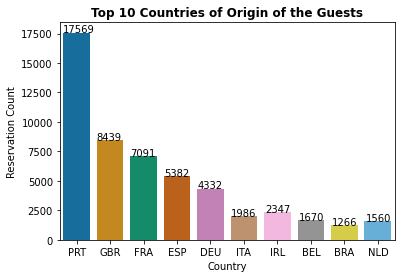

In [86]:
#Top 10 Country wise Guests count
x=copy_df.country.value_counts()
z=sns.countplot(x=copy_df[copy_df['is_canceled'] == 0]['country'], data=copy_df,order=pd.value_counts(copy_df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')
for p in z.patches:
    z.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


##### Remarks:

People from about 166 countries visited the hotels and highest number of guests are from Portugal followed by Great Britain and France.

##**Q.02**

**Which hotel type has more yearly bookings?**

Text(0.5, 1.0, 'yearly bookings')

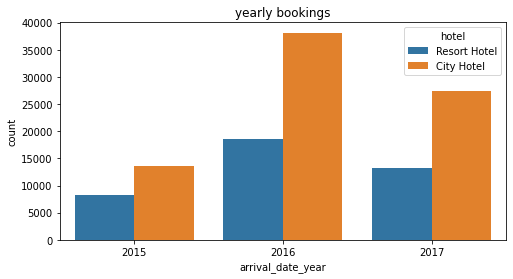

In [99]:
#Checking total bookings of hotels for each year
plt.figure(figsize=(8,4)) 
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ('yearly bookings')


##### Remarks:

The graph we have used here is countplot form seaborn library which is a type of histogram used to visualize the counts of observations in each categorical bin using bars. Ans it indicates that bookings across years is higher for **City Hotel** compared to Resort Hotel.

##**Q.03**

**Study Monthly arrival pattern of Guests?**

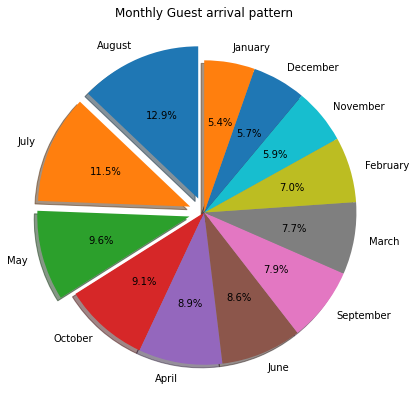

In [117]:
#Visualizing monthly arriving pattern of guests
activities = ['August','July','May','October','April','June','September','March','February',"November",'December','January']
plt.figure(figsize=(14,7))
plt.pie(copy_df.arrival_date_month.value_counts(),
labels =activities,
startangle = 90,
shadow = True,
explode =(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0),
autopct ='%1.1f%%')
plt.title('Monthly Guest arrival pattern')

# Print the chart
plt.show()

##### Remarks:
From the above pie chart we can conclude that most of the guests arrives in month of August followed by May and July.

##**Q.04**

**Which hotel type has more cancellations?**

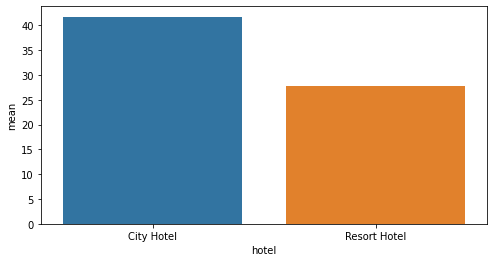

In [103]:
# Checking which type of hotel has max cancellation rate
plt.figure(figsize=(8,4))
a = df.groupby("hotel")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

#####Remarks:

Around 40% bookings were cancelled in city hotel and 30% in resort hotel.

##**Q.05** 

**How long do people stay at the hotels?**

In [106]:
# Checking for how long people stay in Resort hotels
resort_df['total_stay_nights'].value_counts()

1     6894
7     5675
2     4921
3     4285
4     3955
5     2561
6     1625
10     884
14     771
8      700
9      581
0      360
11     291
12     138
13      93
21      45
15      32
28      31
16      18
18      18
17      12
25      12
19      10
22       6
35       5
30       5
42       4
26       3
23       3
29       3
56       2
60       1
45       1
69       1
46       1
27       1
33       1
20       1
38       1
Name: total_stay_nights, dtype: int64

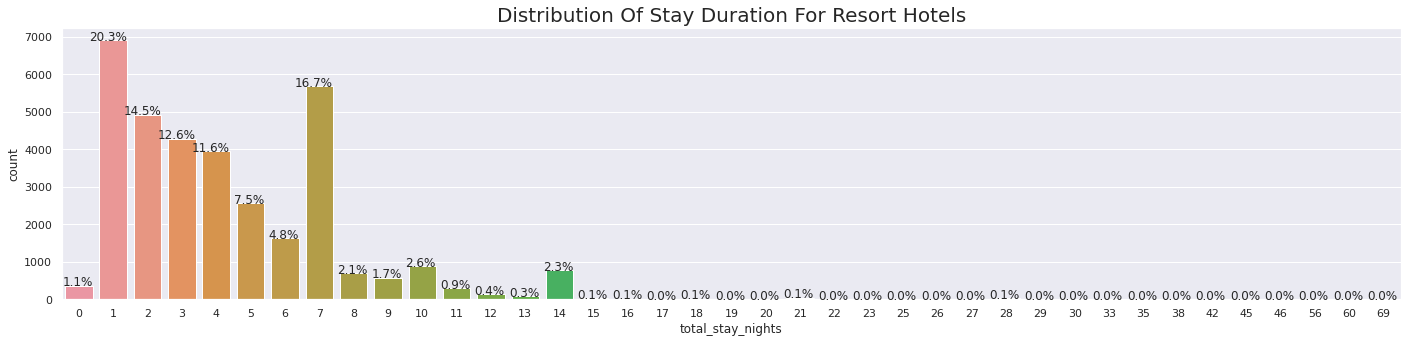

In [ ]:
# Plotting graph to visualize and also show percentage distribution 
plt.figure(figsize=(24,5))
total = float(len(resort_df))
ax = sns.countplot(x='total_stay_nights', data=resort_df)
plt.title('Distribution Of Stay Duration For Resort Hotels', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [ ]:
# Checking for how long people stay in City hotels
city_df['total_stay_nights'].value_counts()

3     13542
2     10813
1     10270
4      9610
5      4168
7      1845
6      1638
8       362
0       231
9       198
10      188
14       88
11       76
12       58
13       40
15       37
16       15
20       13
19       12
29       10
21       10
17        8
30        8
22        6
24        6
18        6
27        3
26        3
28        3
23        2
25        2
48        1
33        1
34        1
Name: total_stay_nights, dtype: int64

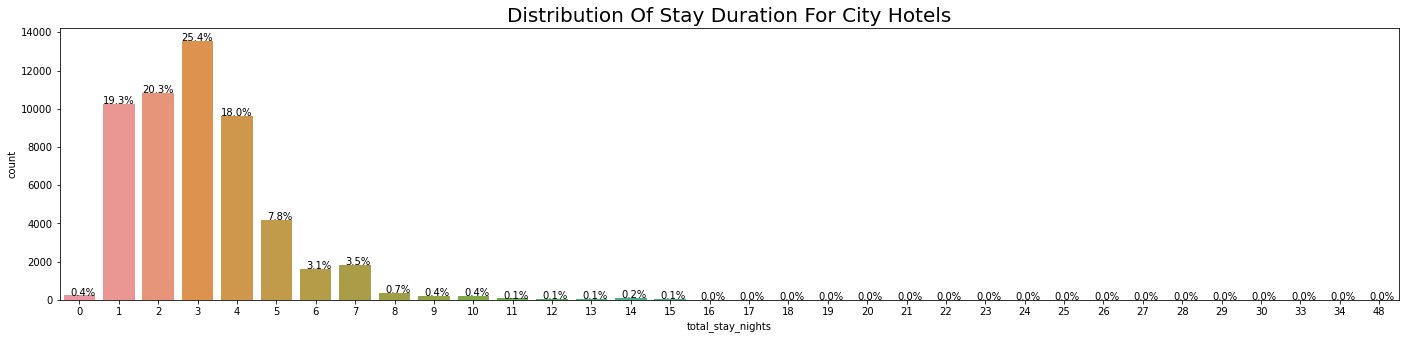

In [107]:
# Plotting graph to visualize and also show percentage distribution 
plt.figure(figsize=(24,5))
total = float(len(city_df))
ax = sns.countplot(x='total_stay_nights', data=city_df)
plt.title('Distribution Of Stay Duration For City Hotels', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

#####Remarks:

For this objective we again used countplot because as mentioned above it is best for visualizing the count of observations. Here we have plotted two graphs, one is for Resort Hotels and the other for City Hotels. 

And from these we can conclude that in resort hotels most people stayed for a duration of 1 day and people mostly prefer staying for around 1 day to a week. While in case of city hotels the most people stayed for 3 days followed by 2 day and then 1 day.

##**Q.06**

**Which meal type is most preferred meal of customer?**

In [108]:
# Checking value counts for different meal types
ax=copy_df['meal'].value_counts()
ax

BB           67900
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0, 0.5, 'count')

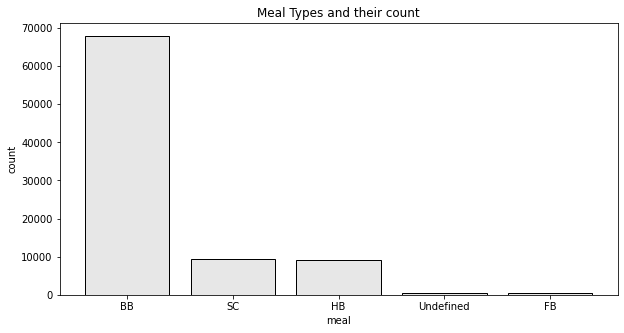

In [111]:
# Visualizing different meal types
plt.figure(figsize=(10,5))
plt.bar(ax.index, ax.values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='black')
plt.title("Meal Types and their count")
plt.xlabel('meal')
plt.ylabel("count")

In [112]:
ax=copy_df[['meal','hotel']].value_counts().unstack()
ax

hotel,City Hotel,Resort Hotel
meal,,
BB,41158.0,26742.0
FB,11.0,349.0
HB,2786.0,6294.0
SC,9317.0,74.0
Undefined,NaN,492.0


Text(0.5, 1.0, 'Preferred Meal Types for both hotels')

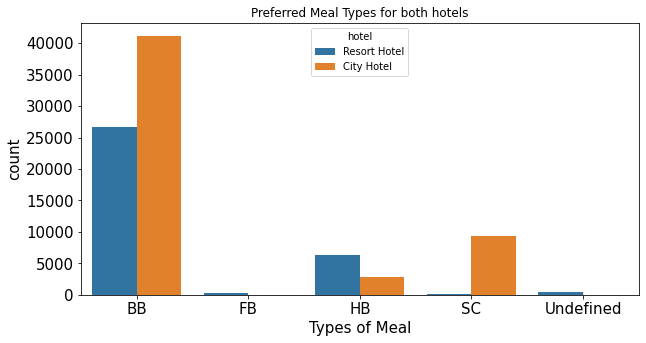

In [113]:
# Comparing preferred meal types for both hotels
plt.figure(figsize=(10,5))
ax=sns.countplot (x= 'meal', data= copy_df, hue= 'hotel')
plt.xticks(size=15)
plt.xlabel('Types of Meal',size=15)
plt.yticks(size=15)
plt.ylabel('count',size=15)
plt.title("Preferred Meal Types for both hotels")

##### Remarks:

Here in the first graph we have used a barplot which is best to show the relationship between a numeric and a categoric variable. And the second graph we have used is countplot to show comparison in preferred meal types between both type of hotels.

From these two graphs we can conclude that for BB is the most preferred meal type for both the hotels.

##**Q.07**
**What is the monthwise average daily rate (ADR)?**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

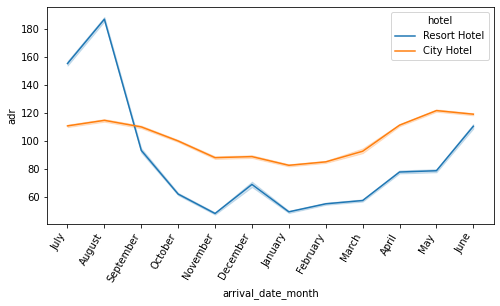

In [115]:
#Visualizing ADR
plt.figure(figsize=(8,4))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.xticks(
    rotation=60,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)

#####Remarks:

For **City hotels**, the average daily rate is more expensive during august, july, june and may.

For **Resort hotels**, the average daily rate is more expensive during august, july and september.



##**Q.08**

**Which is the most reserved room type?**

Text(0.5, 1.0, ' most reserved room type')

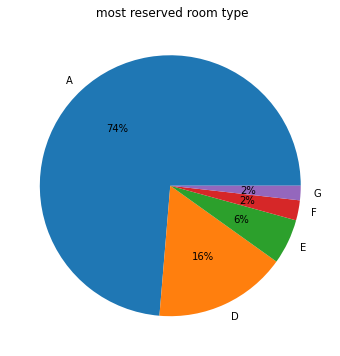

In [116]:
# Visualizing most reserved room type
df.reserved_room_type.value_counts(normalize=True)
plt.figure(figsize=(6,6))
plt.pie(df.reserved_room_type.value_counts().head(5),autopct='%.0f%%', labels = (df.reserved_room_type.value_counts().head(5).keys()))
plt.title(' most reserved room type')

#####Remarks:

The **A room** type is the most popular among the clients.

##**Q.09**

**What is the most common customer type?**

Text(0.5, 1.0, ' most common customer type')

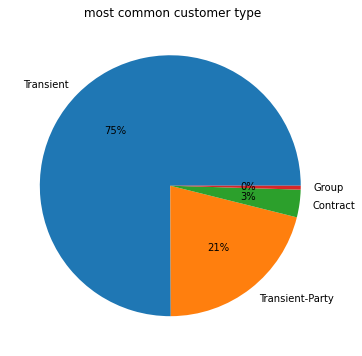

In [142]:
#Visualizing the most common costumer type
df.customer_type.value_counts(normalize=True)
plt.figure(figsize=(6,6))
plt.pie(df.customer_type.value_counts(),autopct='%.0f%%', labels = (df.customer_type.value_counts().keys()))
plt.title(' most common customer type')

#####Remarks:

**Transient** are the most common customer type 

##**Q.10**
**How does the price per night changes yearly?**

In [139]:
#ckecking of per night price change on yearly basis
resort_hotel=copy_df[(copy_df['hotel']=='Resort Hotel')&(copy_df['is_canceled']==0)]
City_hotel=copy_df[(copy_df['hotel']=='City Hotel')&(copy_df['is_canceled']==0)]

resort_night=resort_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()

In [140]:
resort_night

,arrival_date_year,adr
0,2015,91.617758
1,2016,85.563219
2,2017,104.880154


In [141]:
city_night=City_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()

In [134]:
city_night

,arrival_date_year,adr
0,2015,90.570067
1,2016,105.935616
2,2017,119.479880


In [135]:
pri_night=pd.merge(resort_night,city_night,on='arrival_date_year')

In [136]:
pri_night.columns=['arrival_date_year','Resot_hotel_price','City_hotel_price']

In [137]:
pri_night

,arrival_date_year,Resot_hotel_price,City_hotel_price
0,2015,91.617758,90.570067
1,2016,85.563219,105.935616
2,2017,104.880154,119.479880


In [138]:
px.line(pri_night, x = pri_night['arrival_date_year'], y = ['Resot_hotel_price','City_hotel_price'],title='Yearly Night',width=800, height=400)

#####Remarks:

On the above line graph we can conclude that the city hotel continuously changes their night prices per year.
 While in resort hotel it has a falldown at year 2016 and then it also increases prices.

##**Q.11**
**How does the price per night varied on monthly basis?**

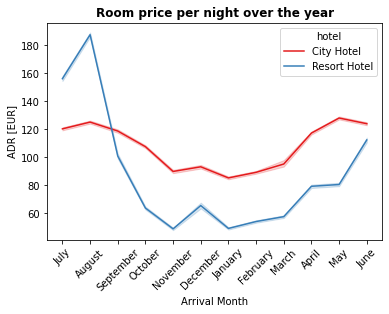

In [143]:
#Checking and visualizing the higher monthly price of hotels
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=copy_df, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("Room price per night over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("ADR [EUR]")
plt.show()

#####Remarks:

By the above line graph we can conclude that on monthly basis Resort hotel has higher price than City hotel.

###**Correlation Heatmap**

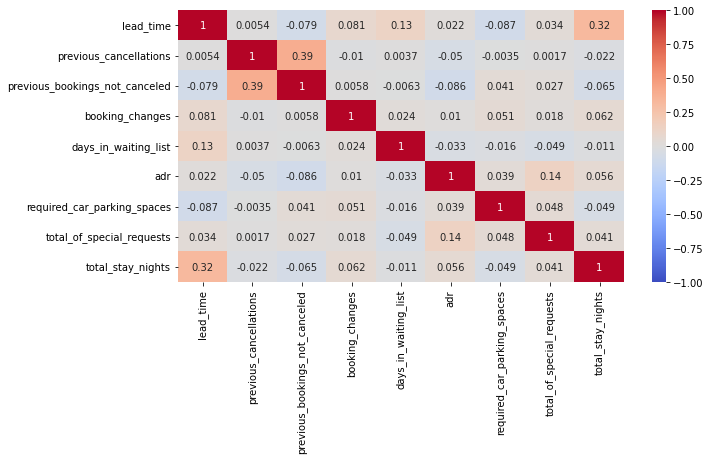

In [144]:
# Correlation Heatmap visualization code
corr_df_data = copy_df[['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list','adr',
          'required_car_parking_spaces','total_of_special_requests','total_stay_nights']]
corr_df=corr_df_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, vmin=-1,annot=True,cmap='coolwarm')

#####Remarks:

We have used heatmap here, because it is considered one of the best chart to visualize correlation between different variables in a dataframe. And from this heatmap we can clearly see that the highest correlation value is 0.39.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

To maximize the bookings and minimize the cancellations of hotel bookings shuuld have to campare all the past data and on the basis of that they can be arrange all the fascilities in months in which most of the guests comes. It could be greatly affects on costumer reteintion and longetivity also. 

# **Conclusion**

1) Highest number of guests are from Portugal followed by Great Britain and France..Least number of visitors came from Countries like Zambia,Madagascar,Sychelles,Faroe Islands etc.Hence there is scope to increase footfall from these countries from where number of customers were less.

2) Bookings across years is higher for city hotel compared to resort hotel.

3) Monthly visit pattern shows a "wave like" pattern where months of July & August were heavily visited and November,December,January were least visted.Other months were moderately visited.

4) Around 40% bookings were cancelled in city hotel and 30% in resort hotel.

5) Duration of stay  reduces drastically after week's stay for  City hotels and reduces drastically after fortnight for resort hotels.Resort hotels seem to be visited for stays either on weekend or weekly or fortnighly basis. People use city hotels mostly for short stays(1-4days). Special customised Packages can be suggested  to increase the stay duration.

6) Breakfast is most prferred mealtype followed by Breakfast+Dinner  and Self catering. Therefore customer experience has to be taken specialy care during timings of these meals as well as availability of utensils, gas in kitchen or kitchenette where guests can prepare their own food.

7) For resort hotels, the average daily rate is more expensive during august, july and september.
For city hotels, the average daily rate is more expensive during august, july, june and may.
 

8) The " A " room type is the most popular among the clients.

9) Transients are the most common customer type.

10) On the above line graph we can conclude that the city hotel continuously changes their night prices per year. While in resort hotel it has a falldown at year 2016 and then it also increases prices.

11)There is marked difference in maximum and monthly room price for resort hotels whereby  room prices in busiest month of Aug is more than 6 times that of lean month of January. This difference is comparitvely very less for city hotels.

# ***Hurrah! You have successfully completed your EDA Capstone Project !!!***